<a href="https://colab.research.google.com/github/PSLMssGerd44/Curso2/blob/master/Tareas_y_ejercicios_C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sesión 1

###**Ejercicio 1**: 
Dentro del conjunto de datos, seleccióne la esquina inferior que contenga  14×14  píxeles en cada una de las imágenes y visualice una de ellas.

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


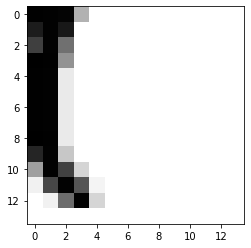

In [ ]:
esquina= train_images[:, 14:, 14:]

seleccion = esquina[4]
import matplotlib.pyplot as plt
plt.imshow(seleccion, cmap=plt.cm.binary)            #selecciona la posición o esa parte de pixeles      
plt.show()


###**Ejercicio 2**: 
Escriba un código en Python que devuelva el máximo valor de un vector.

In [ ]:
import array
def max_value1D(array):

  max=array[0]
  
  for x in range(1, array.shape[0]): 
        if array[x] > max: 
            max = array[x] 
  return max

###**Ejercicio 3**: 
Creen una clase Point en coordenadas cartesianas, que se su constructor inicialice el objeto a un punto con unas coordenadas dadas. Además, la clase debe contener dos métodos:

translate(), que reciba como argumentos dos valores arbitrarios  (𝑥,𝑦).

__str__(self): que imprima el punto en precisión de coma flotante.

In [ ]:
class Punto:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def translate(self, fx, fy):
        self.x += fx
        self.y += fy
        
    def __str__(self):
      return (self.x, self.y)

###RETO adjuntar imagen con modelo entrenado

In [ ]:
from tensorflow import keras
from keras.datasets import fashion_mnist

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_train_full.dtype

dtype('uint8')

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [ ]:
y_train[4]

9

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

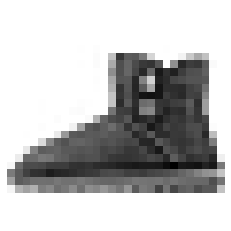

In [ ]:
plt.imshow(X_train[4], cmap="binary")
plt.axis('off');

In [ ]:
import numpy as np

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train[0]]

'Coat'

In [ ]:
X_valid.shape

(5000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

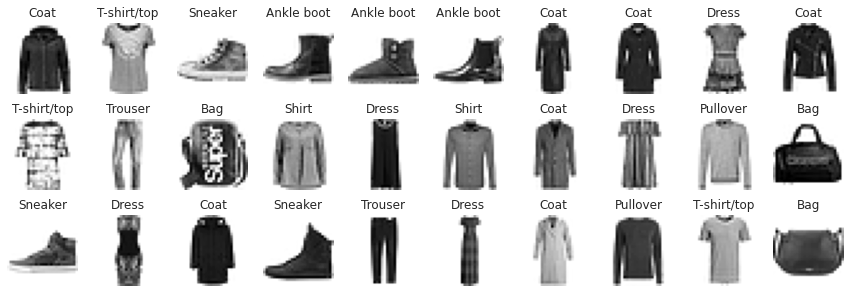

In [ ]:
fig , ax =  plt.subplots(3,10, figsize=(15,5))
for i , ax in enumerate(ax.flat):
  ax.imshow(X_train[i], cmap='binary')
  ax.set_axis_off()
  ax.set_title(class_names[y_train[i]])

In [ ]:
keras.backend.clear_session()

In [ ]:
model = keras.models.Sequential();
model.add(keras.layers.Flatten(input_shape=[28, 28]));
model.add(keras.layers.Dense(300, activation="relu"));
model.add(keras.layers.Dense(100, activation="relu"));
model.add(keras.layers.Dense(10, activation="softmax"));

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd', 
              metrics=["accuracy"])

In [ ]:
history =  model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 18s 10ms/step - loss: 0.7380 - accuracy: 0.7554 - val_loss: 0.5228 - val_accuracy: 0.8274
Epoch 2/20
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4948 - accuracy: 0.8285 - val_loss: 0.4547 - val_accuracy: 0.8424
Epoch 3/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4482 - accuracy: 0.8431 - val_loss: 0.4269 - val_accuracy: 0.8506
Epoch 4/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4223 - accuracy: 0.8506 - val_loss: 0.3960 - val_accuracy: 0.8656
Epoch 5/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4002 - accuracy: 0.8599 - val_loss: 0.3855 - val_accuracy: 0.8660
Epoch 6/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3847 - accuracy: 0.8642 - val_loss: 0.3770 - val_accuracy: 0.8704
Epoch 7/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3708 - accuracy: 0.8681 - val_loss: 0.3669 - val_accur

In [ ]:
import pandas as pd

In [ ]:
df=pd.DataFrame(history.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.738016,0.755382,0.522834,0.8274
1,0.494789,0.828509,0.454668,0.8424
2,0.448165,0.843073,0.426908,0.8506
3,0.422273,0.850582,0.396038,0.8656
4,0.400174,0.859891,0.385472,0.8660


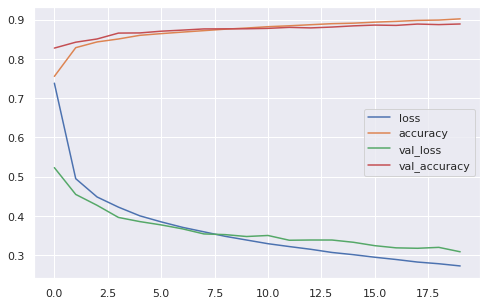

In [ ]:
df.plot(figsize=(8, 5))

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3423 - accuracy: 0.8768


[0.3422735035419464, 0.876800000667572]

In [ ]:
X_new = X_test[:4]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred = predictions = (model.predict(X_new) > 0.5).astype("int32")
y_pred

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [ ]:
np.array(class_names)[y_pred]

array([['T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'Trouser'],
       ['T-shirt/top', 'T-shirt/top', 'Trouser', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top'],
       ['T-shirt/top', 'Trouser', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top'],
       ['T-shirt/top', 'Trouser', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top']], dtype='<U11')

In [ ]:
y_new = y_test[:4]
y_new

array([9, 2, 1, 1], dtype=uint8)

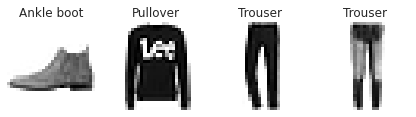

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 4, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)

In [ ]:
model.save('final_model')

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from keras.preprocessing import image

In [ ]:
from google.colab import files
uploaded = files.upload()

 

In [ ]:
image.ImageDataGenerator()
def file_upload(IMG_8771):
	# load the image
  
	imge = load_img(IMG_8771, grayscale=True, target_size=(28, 28))

	# convert to array
	imge = img_to_array(imge)
	# reshape into a single sample with 1 channel
	imge = imge.reshape(1, 28, 28, 1)
	# prepare pixel data
	imge = imge.astype('int32')
	imge = imge / 255
	return imge


In [ ]:
def run_example():
	# load the image
	img = load_img('IMG_8771')
	# load model
	model = load_model('final_model')
	# predict the class
	result = model.predict_classes(img)
	print(result[0])


#Sesión 2

###**Ejercicio 1:**
Usar Sklearn para implementar el modelo de regresión lineal (usar la ecuacion normal y Gradiente Estocástico) en el Dataset FuelConsumption.csv para predecir la emisión de CO2 de algunos autos basado en algunas de sus características.
Recuerde que en sklearn puede implementar el gradiente de descenso importando:

from sklearn.linear_model import SGDRegressor

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import validation_curve

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso2/master/Datasets/FuelConsumption.csv')

In [ ]:
data.info()    #primero a hacer todo el mapeo para conocer el dataset, lo básico

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [ ]:
data.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
899,2014,PORSCHE,CAYMAN S,TWO-SEATER,3.4,6,AM7,Z,11.3,7.9,9.8,29,225
278,2014,CHRYSLER,200 CONVERTIBLE FFV,COMPACT,3.6,6,A6,E,17.0,11.2,14.4,20,230
669,2014,LEXUS,LS 460,MID-SIZE,4.6,8,AS8,Z,14.5,9.6,12.3,23,283
768,2014,MERCEDES-BENZ,S 550 4MATIC SWB,FULL-SIZE,4.7,8,AS7,Z,14.2,9.4,12.0,24,276
544,2014,INFINITI,QX70 AWD,SUV - SMALL,3.7,6,AS7,Z,14.5,10.7,12.8,22,294


In [ ]:
X=data.loc[:,['ENGINESIZE','FUELTYPE','FUELCONSUMPTION_CITY']]        #separar especificamente valores por colunar
y = data['CO2EMISSIONS']

In [ ]:
X=pd.get_dummies(X, drop_first=True)      #recuerda que los dummies convierte la info categórica en variables de indicación, los hace columnas pues

In [ ]:
X.head()            #visualizar la separación

,ENGINESIZE,FUELCONSUMPTION_CITY,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
0,2.0,9.9,0,0,1
1,2.4,11.2,0,0,1
2,1.5,6.0,0,0,1
3,3.5,12.7,0,0,1
4,3.5,12.1,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=0)

In [ ]:
X.shape

(1067, 5)

In [ ]:
y.shape

(1067,)

In [ ]:
model = Pipeline((
      ('scale', StandardScaler()),  ('poly', PolynomialFeatures(degree=2)), ('linear_regression', LinearRegression() )    
))            #revisa en notas pipeline y eso hace

In [ ]:
model.fit(X_train,y_train)      #acomoda el modelo

Pipeline(steps=[('scale', StandardScaler()), ('poly', PolynomialFeatures()),
                ('linear_regression', LinearRegression())])

In [ ]:
y_fit=model.predict(X_test)
r2_score(y_test,y_fit)              #saca los erores, es decir, la distancia del "modelo" al punto en sí y la presición

0.9905292971987586

In [ ]:
model = Pipeline((
      ('scale', StandardScaler()),  ('poly', PolynomialFeatures(degree=2)), ('SGD', SGDRegressor(max_iter=1000, penalty=None))
 ))

In [ ]:
param_range=np.arange(1,100)                  #saca parametros para coparar entre datos de entrenamiento y validación
train_score, val_score=validation_curve(model, X_train, y_train, param_name='SGD__max_iter', param_range=param_range, cv=5, n_jobs=-1)

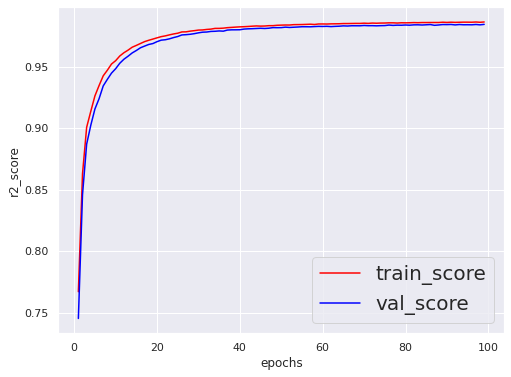

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(param_range, np.mean(train_score,1), color='red',label='train_score')
plt.plot(param_range, np.mean(val_score,1), color='blue', label='val_score')              #en este código ya losgrafica y compara
plt.legend( fontsize=20)
plt.xlabel('epochs')
plt.ylabel('r2_score');

In [ ]:
model.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()), ('poly', PolynomialFeatures()),
                ('SGD', SGDRegressor(penalty=None))])

In [ ]:
y_fit=model.predict(X_test)
r2_score(y_test,y_fit)                              #igual acá

0.9901104672180132

In [ ]:
#función de coste cualquiera
import numpy as np
costo = lambda w: np.sin(1/2 * w[0]**2 - 1/4 * w[1]**2 + 3) * np.cos(2*w[0] - np.e**w[1]) #crea algo así como una función de gradiente descendente, donde el costo es w[0] que es el bias
costo([1,2])

0.374762046993176

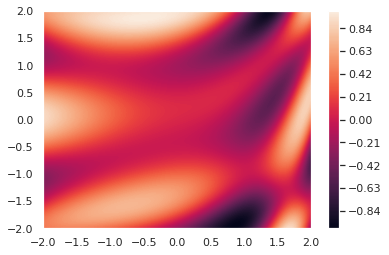

In [ ]:
import matplotlib.pyplot as plt
#forma
N = 200
x = np.linspace(-2,2,N)
y = np.linspace(-2,2,N)
z = np.zeros((N,N))                                                           #Grafica para medir la relación de datos (o eso entiendo yo)
for i,xi in enumerate(x):
  for j,yj in enumerate(y):
    z[i,j] = costo([xi,yj])
plt.contourf(x,y,z,200)
plt.colorbar()
plt.show()

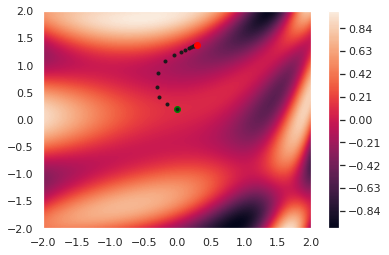

In [ ]:
plt.contourf(x,y,z,200)
plt.colorbar()
np.random.seed(4)
Ws = np.random.rand(2) * 2 - 1
Ws = [0,0.2]
Wc = np.copy(Ws)
h = 0.01
alpha = 0.005
grad = np.zeros(2)
plt.plot(Ws[0],Ws[1],'o',c='green')
for _ in range(100000): # cantidad de iteraciones
  for it, w in enumerate(Ws):
    Wc = np.copy(Ws)
    Wc[it] = Wc[it] + h
    derivada = (costo(Wc) -costo (Ws))/h #derivada parcial por diferencias mínimas
    grad[it] = derivada
    
  Ws = Ws - alpha * grad
  
  if _%100 == 0:
    plt.plot(Ws[0],Ws[1], 'k.')
    
plt.plot(Ws[0],Ws[1],'o',c='red')

###**Ejercicio 2:**
Con los siguientes vector, escalar y los datos de entrada de la compuerta lógica **AND**, escribir una función que regrese las salidas correctas, usando un perceptrón. 

$W =
 \begin{pmatrix}
  1  \\
  1 \\
 \end{pmatrix}$

$B=-1.5$

In [ ]:
import numpy as np
def And(X,W,B):
  X1=np.heaviside(np.dot(X,W)+B,1)
  return(X1)
  
X=np.array([[0,0],[0,1],[1,0],[1,1]])                           #arreglo y uso de logic gates
W=np.array([1,1])
B=-1.5
y=And(X,W,B)
print(y)

[0. 0. 0. 1.]


###**Ejercicio 3:**
Implementar un modelo de red neuronal usando Keras para predecir los sobrevivientes del titanic. El modelo debe tener dos capas ocultas densas con 16 neuronas cada una y funcion de activacion relu. como optimizador usar descenso del gradiente estocástico como función de pérdida usar binary_crossentropy y como métrica usar accuracy.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.impute import SimpleImputer
from tensorflow import keras

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso2/master/Datasets/titanic.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.shape

(891, 12)

In [ ]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.drop(['PassengerId','Name','Ticket','Cabin','Embarked'], axis=1, inplace=True)       #elimina inútiles

In [ ]:
data.sample(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
881,0,3,male,33.0,0,0,7.8958
675,0,3,male,18.0,0,0,7.7750
238,0,2,male,19.0,0,0,10.5000
328,1,3,female,31.0,1,1,20.5250


In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
data.loc[data['Survived']==1,['Age']]=imp.fit_transform(data.loc[data['Survived']==1,['Age']])
data.loc[data['Survived']==0,['Age']]=imp.fit_transform(data.loc[data['Survived']==0,['Age']])

In [ ]:
data.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
dtype: bool

In [ ]:
data=pd.get_dummies(data)

In [ ]:
data['Family_size']=data['SibSp'] + data['Parch']
data.drop(['SibSp', 'Parch'] ,axis=1, inplace=True)               #crea una nueva columna combinando datos para hacer mas fácil leer
data.head()

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Family_size
0,0,3,22.0,7.2500,0,1,1
1,1,1,38.0,71.2833,1,0,1
2,1,3,26.0,7.9250,1,0,0
3,1,1,35.0,53.1000,1,0,1
4,0,3,35.0,8.0500,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:], data.iloc[:,0],test_size = 0.2, random_state=0)

In [ ]:
X_train.shape #cuando se escala en el siguiente, mantiene las mismas dimensiones

(712, 6)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
keras.backend.clear_session()                 #se usa para que keras sepa que son nuevos datos o que vas a hacer nuevas capas

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.Dense(16,activation='relu', input_shape=(6,)),
                                 keras.layers.Dense(16,activation='relu'),
                                 keras.layers.Dense(1, activation='sigmoid')                       #entrena el modelo, las capas y activación
])

In [ ]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
history=model.fit(X_train_scaled,y_train, epochs=50, validation_split=0.2)

Epoch 1/50
18/18 [==============================] - 1s 16ms/step - loss: 0.7008 - accuracy: 0.5782 - val_loss: 0.7080 - val_accuracy: 0.5245
Epoch 2/50
18/18 [==============================] - 0s 4ms/step - loss: 0.6767 - accuracy: 0.6432 - val_loss: 0.6873 - val_accuracy: 0.5385
Epoch 3/50
18/18 [==============================] - 0s 5ms/step - loss: 0.6540 - accuracy: 0.6591 - val_loss: 0.6666 - val_accuracy: 0.5594
Epoch 4/50
18/18 [==============================] - 0s 5ms/step - loss: 0.6328 - accuracy: 0.6801 - val_loss: 0.6480 - val_accuracy: 0.6084
Epoch 5/50
18/18 [==============================] - 0s 5ms/step - loss: 0.6137 - accuracy: 0.7135 - val_loss: 0.6311 - val_accuracy: 0.6364
Epoch 6/50
18/18 [==============================] - 0s 5ms/step - loss: 0.5966 - accuracy: 0.7223 - val_loss: 0.6159 - val_accuracy: 0.6643
Epoch 7/50
18/18 [==============================] - 0s 5ms/step - loss: 0.5813 - accuracy: 0.7575 - val_loss: 0.6019 - val_accuracy: 0.6783
Epoch 8/50
18/18 [=

In [ ]:
model.evaluate(X_test_scaled,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.4293 - accuracy: 0.7877


[0.4293031692504883, 0.7877094745635986]

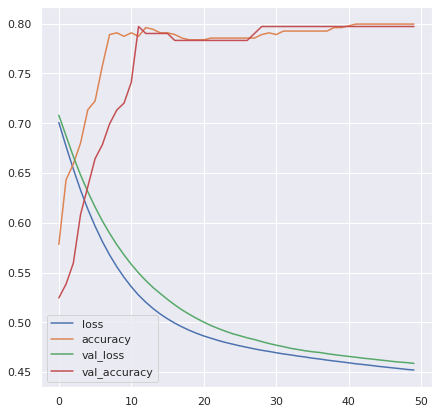

In [ ]:
pd.DataFrame(history.history).plot(figsize=(7,7))                   #grafica la evaluación del modelo

#Sesión 3


###**Ejercicio 1:**
Con ayuda del **pipeline** de sklearn, construir uno de forma tal qué, escale mis datos, reduzca mi dimensión(dimensión 2) y aplique un clasificador de arbol de decisión (DecisionTreeClassifier) al iris data set, donde a este último solo le pondremos como parámetro el **random_state=42**. Entrenarlo y evaluarlo.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from sklearn import datasets
from sklearn.decomposition import PCA

In [ ]:
data = datasets.load_iris()
X_train,X_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.2)

In [ ]:
X_train.shape

(120, 4)

In [ ]:
X_test

array([[6.9, 3.1, 5.4, 2.1],
       [6. , 3.4, 4.5, 1.6],
       [5.7, 2.8, 4.5, 1.3],
       [7.7, 3.8, 6.7, 2.2],
       [5.6, 2.8, 4.9, 2. ],
       [6.4, 2.7, 5.3, 1.9],
       [6.7, 3. , 5. , 1.7],
       [4.4, 3. , 1.3, 0.2],
       [6.3, 2.5, 4.9, 1.5],
       [6.1, 2.9, 4.7, 1.4],
       [6. , 2.2, 5. , 1.5],
       [5.9, 3.2, 4.8, 1.8],
       [5.4, 3.4, 1.5, 0.4],
       [5.7, 2.9, 4.2, 1.3],
       [7.7, 2.6, 6.9, 2.3],
       [5.4, 3.9, 1.7, 0.4],
       [5.5, 2.3, 4. , 1.3],
       [4.8, 3.1, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [5.5, 3.5, 1.3, 0.2],
       [7.2, 3.2, 6. , 1.8],
       [4.9, 3.6, 1.4, 0.1],
       [4.8, 3.4, 1.6, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [4.9, 3.1, 1.5, 0.2],
       [6.1, 2.8, 4. , 1.3],
       [6.7, 3.1, 4.7, 1.5],
       [6.8, 3. , 5.5, 2.1],
       [5.5, 2.5, 4. , 1.3],
       [5.7, 2.8, 4.1, 1.3]])

In [ ]:
y_train                 #este y anteriores: dividir y mostrar datos

array([1, 0, 1, 0, 2, 0, 2, 0, 1, 2, 1, 1, 2, 1, 2, 0, 2, 1, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 2, 0, 0, 2, 2, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 1,
       1, 1, 2, 1, 0, 0, 1, 2, 0, 1, 2, 1, 2, 2, 1, 1, 0, 0, 2, 0, 0, 2,
       2, 0, 1, 0, 0, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 1, 1, 0, 1,
       2, 1, 2, 2, 0, 2, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 0, 1, 2, 2, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 1, 2, 0])

In [ ]:
modelo=Pipeline([('scaler',StandardScaler()),('pca',PCA(n_components=2)),('regl',LogisticRegression(random_state=42))])
modelo                          #saca el pipeline con componentes y abreviaciones

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('regl', LogisticRegression(random_state=42))])

In [ ]:
modelo2=make_pipeline(StandardScaler(),PCA(n_components=2),(LogisticRegression(random_state=42)))
modelo2               crea otro similar pero ya con parámetros dados

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('logisticregression', LogisticRegression(random_state=42))])

In [ ]:
modelo.steps[0]         #pasos del primer objeto

('scaler', StandardScaler())

In [ ]:
modelo[0]             #sample

StandardScaler()

In [ ]:
modelo['regl']

LogisticRegression(random_state=42)

In [ ]:
modelo.set_params() #parámetros internos pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('regl', LogisticRegression(random_state=42))])

In [ ]:
modelo.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('regl', LogisticRegression(random_state=42))])

In [ ]:
y_h=modelo.predict(X_test)

In [ ]:
modelo.score(X_test,y_test)             #accuracy

0.8666666666666667

In [ ]:
from sklearn.tree import DecisionTreeClassifier

modelo3=Pipeline([('scaler',StandardScaler()),('pca',PCA(n_components=2)),('des_tree',DecisionTreeClassifier(random_state=42))])

In [ ]:
modelo[2]

LogisticRegression(random_state=42)

In [ ]:
modelo[1]           #igual que caso anterior

PCA(n_components=2)

In [ ]:
modelo3.fit(X_train,y_train)
modelo3.score(X_test,y_test)

0.9

###**Ejercicio 2:**
Realizar un **pipeline** en el cual se **escalen** mis datos del iris data set y luego se use el clasificador **k-neighbors clasiffier** para **n_neighbors=1**. Finalmente usar en el anterior el protocolo de **k-fold cross-validation** para k=3.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

pip=Pipeline([('stan',StandardScaler()),('kneig',KNeighborsClassifier(n_neighbors=1))])        
cross_val_score(pip,X,y,cv=3)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


array([0.5, 1. , 1. ])

###**Ejercicio 3:**
Haga una red neuronal de 2 capas (2 neuronas ocultas y 1 de salida) usando únicamente numpy para ajustar el XOR usando la función escalera como función de activación. Tip: XOR=AND(OR,NAND)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Al=[0]*2
Bl=[0]*2

In [ ]:
X=np.array([[0,0],[0,1],[1,0],[1,1]])           #crea un array
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [ ]:
Al[0]=np.array([[1/2,-1/3],[1/2,-1/3]])
Bl[0]=np.array([-1/2,1/2])                                  #establece parámetros para posibilidades y las dimensiones
Al[1]=np.array([[1/3],[1/3]])
Bl[1]=np.array([-1/2])

In [ ]:
Bl[0]                       #ejemplo de ese array y dato

array([-0.5,  0.5])

In [ ]:
step=lambda x:(x>=0)          #lambda se utiliza para que las corra cuando se necesita y sólo cuando cumple, es una función que sigue corriendo, no como sería def

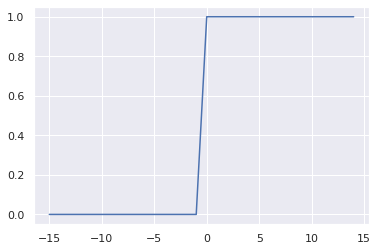

In [ ]:
plt.plot(np.arange(-15,15),step(np.arange(-15,15)))

In [ ]:
Xl=[]
x=X                                     #separa de nuevo los datos
x

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [ ]:
for L in range(2):
  x=step(np.dot(x,Al[L])+Bl[L])                                  # los pone a prueba y compara los de la capa inicial
  Xl.append(x)
print(Xl)

[array([[False,  True],
       [ True,  True],
       [ True,  True],
       [ True, False]]), array([[False],
       [ True],
       [ True],
       [False]])]


In [ ]:
Xoculta=step(np.dot(X,Al[0])+Bl[0])                 #capas ocultas
Xoculta

array([[False,  True],
       [ True,  True],
       [ True,  True],
       [ True, False]])

In [ ]:
Xfinal=step(np.dot(Xoculta,Al[1])+Bl[1])                    #capa de salida
Xfinal

array([[False],
       [ True],
       [ True],
       [False]])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

In [ ]:
modelo=Sequential([Dense(2,input_shape=(2,),activation='tanh'),Dense(1,activation='sigmoid')])

In [ ]:
modelo.summary()                                  #resumen del modelo

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 2)                 6         
                                                                 
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelo.compile(optimizer='sgd',loss='binary_crossentropy')                  #pérdida o medición del error

In [ ]:
X=np.array([[0,0],[0,1],[1,0],[1,1]])                     #usa de nuevo arrays. Note que el X tiene listas y [], y sólo un []
y=np.array([0,1,1,0])

In [ ]:
modelo.fit(x=X,y=y,epochs=5000)

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
1/1 [==============================] - 0s 14ms/step - loss: 0.6380
Epoch 2502/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.6380
Epoch 2503/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.6379
Epoch 2504/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6379
Epoch 2505/5000
1/1 [==============================] - 0s 15ms/step - loss: 0.6378
Epoch 2506/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.6378
Epoch 2507/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.6378
Epoch 2508/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.6377
Epoch 2509/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.6377
Epoch 2510/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.6376
Epoch 2511/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.6376
Epoch 2512/5000
1/1 [===============

In [ ]:
predictions = (modelo.predict(X) > 0.5).astype("int32")

###**Ejercicio 4:** 
Calssificacion binaria 
objetivo: predecir si las personas tienen o no una enfermedad del corazon.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso2/master/Datasets/heart.csv')

In [ ]:
data.sample(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
70,54,1,2,120,258,0,0,147,0,0.4,1,0,3,1
102,63,0,1,140,195,0,1,179,0,0.0,2,2,2,1
30,41,0,1,105,198,0,1,168,0,0.0,2,1,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


Information

1. age: The person's age in years
2. sex: The person's sex (1 = male, 0 = female)
3. cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
4. trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
5. chol: The person's cholesterol measurement in mg/dl
6. fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
7. restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
8. thalach: The person's maximum heart rate achieved
9. exang: Exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot
11. slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
12. ca: The number of major vessels (0-3)
13. thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
14. target: Heart disease (0 = no, 1 = yes)

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

To see Test Costs (donated by Peter Turney), please see the folder "Costs"

In [ ]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [ ]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

1    165
0    138
Name: target, dtype: int64


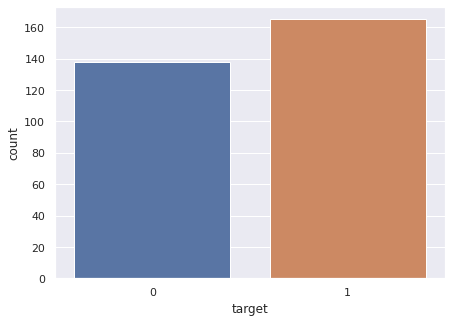

In [ ]:
print(data.target.value_counts())
plt.figure(figsize=(7,5))
sns.countplot(x='target', data=data)

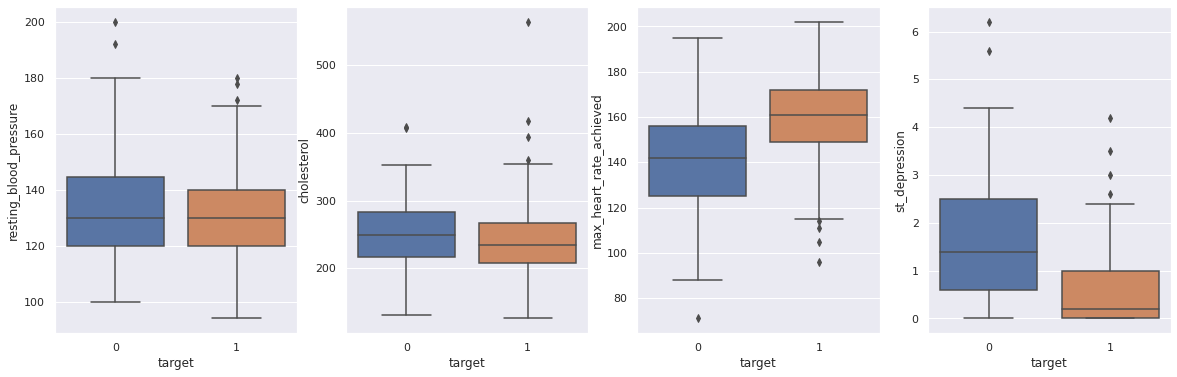

In [ ]:
fig, ax = plt.subplots(1,4,figsize=(20,6))
sns.boxplot(x='target',y='resting_blood_pressure' ,data=data, ax=ax[0])
sns.boxplot(x='target',y='cholesterol' ,data=data,ax=ax[1])
sns.boxplot(x='target',y='max_heart_rate_achieved' ,data=data,ax=ax[2])
sns.boxplot(x='target',y='st_depression' ,data=data,ax=ax[3])

(14.5, -0.5)

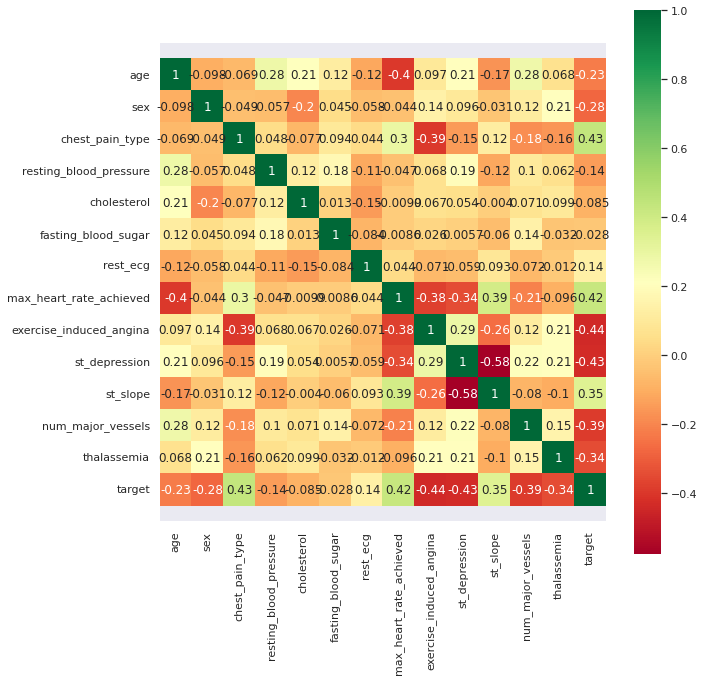

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', square=True)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t)

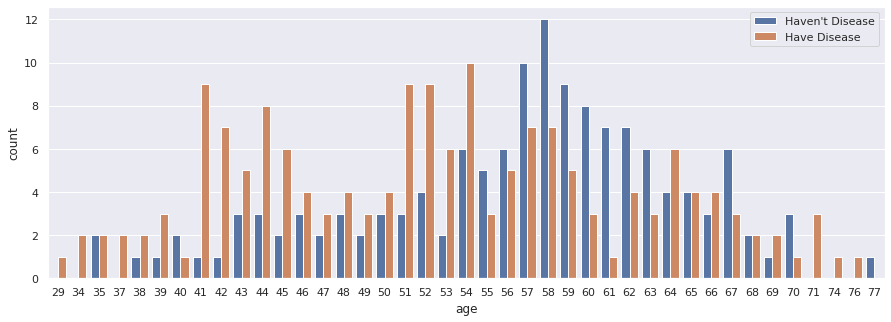

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='age', data=data, hue='target')
plt.legend(["Haven't Disease", "Have Disease"],loc='upper right')

In [ ]:
def plot_count_bar(feature):
  fig, ax = plt.subplots(1,2,figsize=(10,7))
  sns.countplot(x=feature, data=data, hue='target', ax=ax[0])
  ax[0].legend(["Haven't Disease", "Have Disease"],loc='best')
  sns.barplot(x=feature, y='target', data=data,ax=ax[1])

In [ ]:
data['sex'] = data['sex'].map({0:'female', 1:'male'})

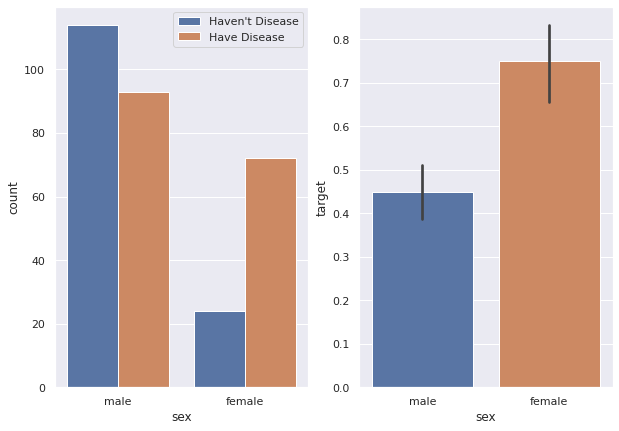

In [ ]:
plot_count_bar('sex')

In [ ]:
data['chest_pain_type'] = data['chest_pain_type'].map({0:'typical angina', 1:'atypical angina', 2:'non-anginal pain', 3:'asymptomatic'})

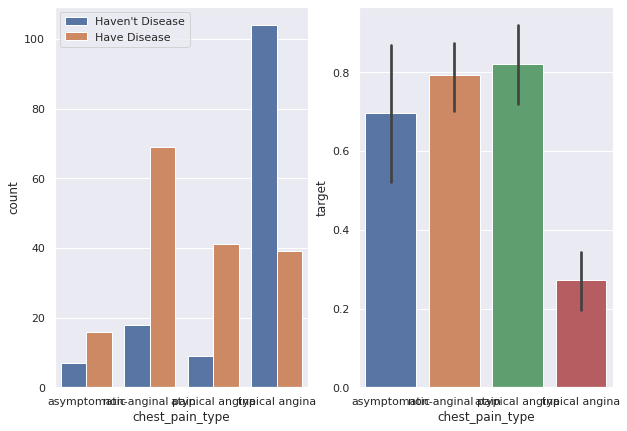

In [ ]:
plot_count_bar('chest_pain_type')

In [ ]:
data['fasting_blood_sugar'] = data['fasting_blood_sugar'].map({0:'lower than 120mg/ml',1:'greater than 120mg/ml'})

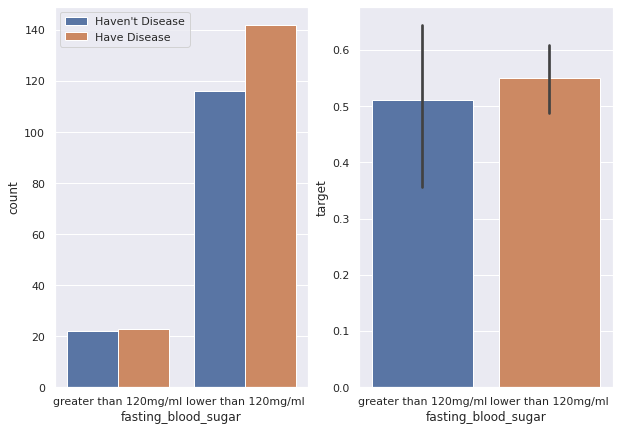

In [ ]:
plot_count_bar('fasting_blood_sugar')

In [ ]:
data['rest_ecg'] = data['rest_ecg'].map({0:'normal', 1 : 'ST-T abnormality', 2:'hypertrophy'})

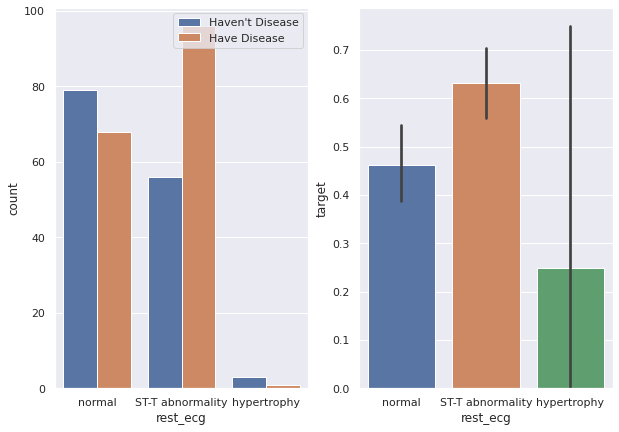

In [ ]:
plot_count_bar('rest_ecg')

In [ ]:
data['exercise_induced_angina'] = data['exercise_induced_angina'].map({0:'no', 1 : 'yes'})

In [ ]:
data['st_slope'] = data['st_slope'].map({0: 'upsloping',  1: 'flat', 2: 'downsloping'})

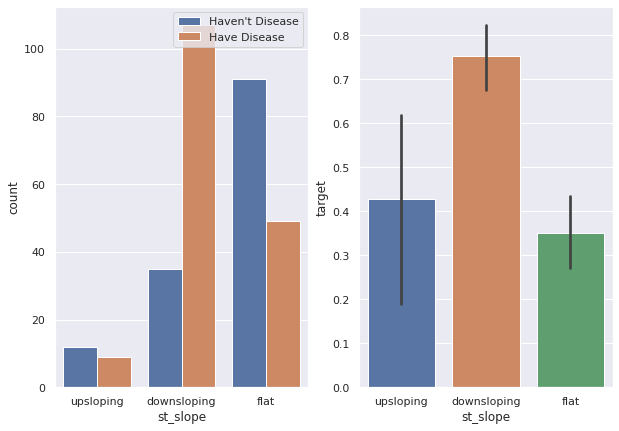

In [ ]:
plot_count_bar('st_slope')

In [ ]:
data['thalassemia'] = data['thalassemia'].map({1 :'normal', 2 : 'fixed defect', 3 :'reversable defect'})


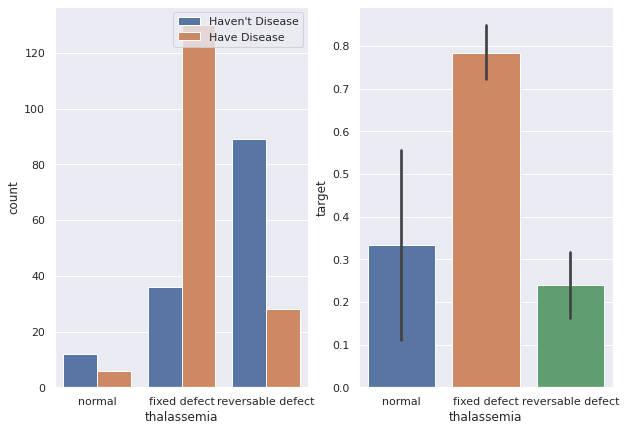

In [ ]:
plot_count_bar('thalassemia')

In [ ]:
data.sample(4)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
59,57,female,typical angina,128,303,lower than 120mg/ml,normal,159,no,0.0,downsloping,1,fixed defect,1
180,55,male,typical angina,132,353,lower than 120mg/ml,ST-T abnormality,132,yes,1.2,flat,1,reversable defect,0
6,56,female,atypical angina,140,294,lower than 120mg/ml,normal,153,no,1.3,flat,0,fixed defect,1
86,68,male,non-anginal pain,118,277,lower than 120mg/ml,ST-T abnormality,151,no,1.0,downsloping,1,reversable defect,1


In [ ]:
X=data.iloc[:,:-1]
y=data['target']
X=pd.get_dummies(X)

In [ ]:
X.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_female,sex_male,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,...,rest_ecg_hypertrophy,rest_ecg_normal,exercise_induced_angina_no,exercise_induced_angina_yes,st_slope_downsloping,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,0,1,1,0,...,0,1,1,0,0,0,1,0,1,0
1,37,130,250,187,3.5,0,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
2,41,130,204,172,1.4,0,1,0,0,1,...,0,1,1,0,1,0,0,1,0,0
3,56,120,236,178,0.8,0,0,1,0,1,...,0,0,1,0,1,0,0,1,0,0
4,57,120,354,163,0.6,0,1,0,0,0,...,0,0,0,1,1,0,0,1,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(242, 25)

In [ ]:
model = Pipeline((
    ('scale', StandardScaler()), ('log_reg',LogisticRegression(C=10, solver='lbfgs', n_jobs=-1, fit_intercept=True))
))

In [ ]:
model.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('log_reg', LogisticRegression(C=10, n_jobs=-1))])

In [ ]:
y_fit=model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_fit))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



(2.5, -0.5)

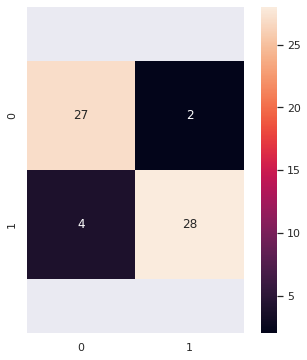

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test,y_fit), annot=True, square=True)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t)

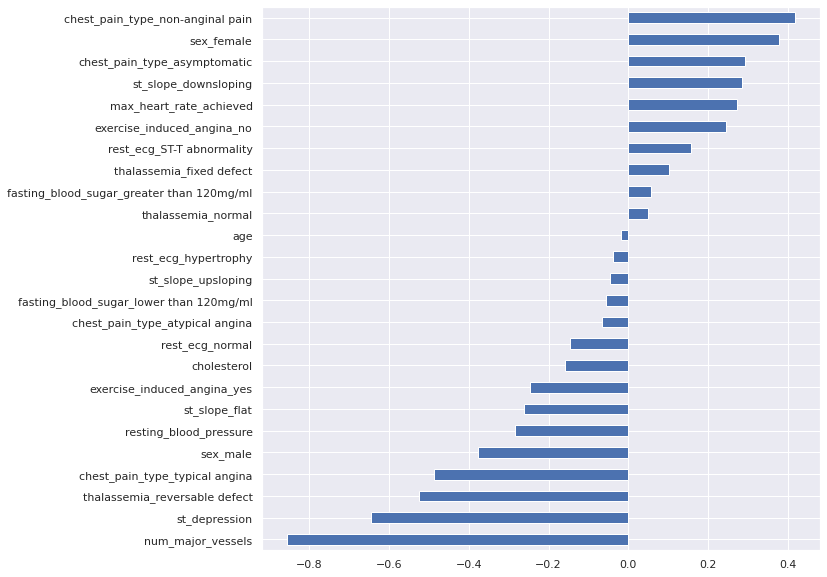

In [ ]:
plt.figure(figsize=(10,10))
pd.Series((model[1].coef_[0]), index=X_train.columns).sort_values().plot(kind='barh')

In [ ]:
grid_params = {
    'log_reg__C':np.linspace(1,100,5),
    'log_reg__fit_intercept': [True,False]
}

In [ ]:
scale = StandardScaler()

In [ ]:
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

In [ ]:
keras.backend.clear_session()

In [ ]:
model = keras.models.Sequential([
     keras.layers.Dense(5, activation='relu', input_shape = X_train.shape[1:]),    
     keras.layers.Dense(5, activation='relu'), 
     keras.layers.Dense(1 , activation='sigmoid')   
                             
])

In [ ]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train_scaled,y_train, epochs=50, validation_split=0.2)

Epoch 1/50
7/7 [==============================] - 1s 104ms/step - loss: 0.7653 - accuracy: 0.4819 - val_loss: 0.7267 - val_accuracy: 0.5510
Epoch 2/50
7/7 [==============================] - 0s 15ms/step - loss: 0.7546 - accuracy: 0.5181 - val_loss: 0.7126 - val_accuracy: 0.5510
Epoch 3/50
7/7 [==============================] - 0s 16ms/step - loss: 0.7357 - accuracy: 0.5337 - val_loss: 0.7076 - val_accuracy: 0.5510
Epoch 4/50
7/7 [==============================] - 0s 20ms/step - loss: 0.7279 - accuracy: 0.5389 - val_loss: 0.7011 - val_accuracy: 0.5714
Epoch 5/50
7/7 [==============================] - 0s 18ms/step - loss: 0.7201 - accuracy: 0.5544 - val_loss: 0.6925 - val_accuracy: 0.5918
Epoch 6/50
7/7 [==============================] - 0s 18ms/step - loss: 0.7094 - accuracy: 0.5492 - val_loss: 0.6853 - val_accuracy: 0.6122
Epoch 7/50
7/7 [==============================] - 0s 14ms/step - loss: 0.7009 - accuracy: 0.5648 - val_loss: 0.6802 - val_accuracy: 0.6122
Epoch 8/50
7/7 [==========

In [ ]:
def build_model(n_neurons=5,input_shape=(25,)):
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(n_neurons, activation='relu', input_shape=input_shape))
  model.add(keras.layers.Dense(n_neurons, activation='relu' ))
  model.add(keras.layers.Dense(1, activation='sigmoid'))
  model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
keras_cs = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model, epochs=100, validation_split=0.2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
model =  Pipeline([
                   ('scale', StandardScaler()), ('ann', keras_cs)
])

In [ ]:
def build_model(n_hidden=1, n_neurons=5,input_shape=(25,)):
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(n_neurons, activation='relu', input_shape=input_shape))
  for i in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation='relu'))
  model.add(keras.layers.Dense(1, activation='sigmoid'))
  model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
keras_cs = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model, epochs=50, verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
model =  Pipeline([
                   ('scale', StandardScaler()), ('ann', keras_cs)
])

In [ ]:
params = {
    'ann__n_hidden':[0,1,2,3],
    'ann__n_neurons':np.arange(0,15),
    'ann__batch_size':[10,15,20]
}

In [ ]:
rnd_search = RandomizedSearchCV(model, params, n_iter=50, n_jobs=-1, cv=3, scoring='accuracy')

###**Ejercicio 5:**
Clasificación multiclase: Objetivo: predecir entre 6 tipos de vridiros diferentes apartir de su composicion quimica

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso2/master/Datasets/glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
data.info()                                       #visualizar y entender el dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [ ]:
data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [ ]:
data.isnull().any()                 #nulos

RI      False
Na      False
Mg      False
Al      False
Si      False
K       False
Ca      False
Ba      False
Fe      False
Type    False
dtype: bool

(10.5, -0.5)

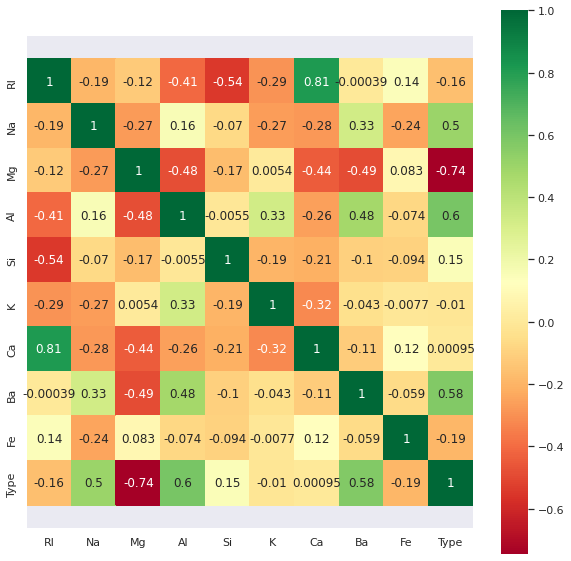

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', square=True)                          #grafica las relaciones
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t)

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64


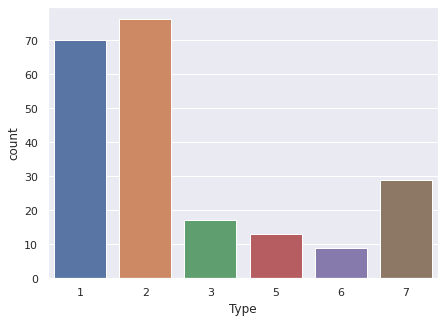

In [ ]:
print(data.Type.value_counts())
plt.figure(figsize=(7,5))
sns.countplot(x='Type', data=data);                                     #selecciona y grafica entre tipo y cuantos hay por tipo

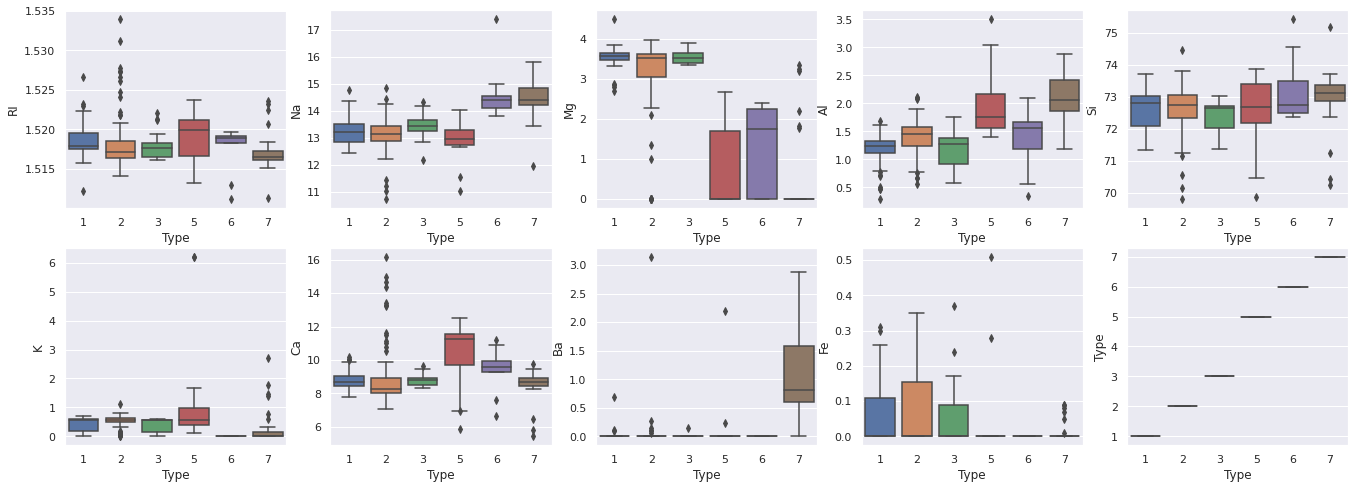

In [ ]:
fig, ax = plt.subplots(2,5, figsize=(23,8))
names=data.columns                                #grafica con box los datos, pero teniendo en cuenta los que se salen de los márgenes de la caja
for i , ax in enumerate(ax.flat):  
  sns.boxplot(data=data, x='Type', y=names[i] , orient='vertical' , ax=ax)                

In [ ]:
def IQR(x, value=1.5):
  Q1 = np.nanpercentile(x,25)
  Q3 = np.nanpercentile(x,75)
  IQR = Q3 - Q1
  upper = Q3 + value*IQR
  lower = Q1 - value*IQR                              #intentar "normalizar" los datos o ajustar que entren en una mejor medida en el box
  x[x > upper] = np.nan
  x[x < lower] = np.nan
  return x

In [ ]:
for i in data.columns[:-1]:
  for j in data['Type'].unique():                           #separar los que están alejados y son "únicos"
    data.loc[data['Type']==j, i]=IQR(data.loc[data['Type']==j, i])

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
for i in data['Type'].unique():  
  data.loc[data['Type']==i,'RI':'Fe']=imp.fit_transform(data.loc[data['Type']==i,'RI':'Fe'])

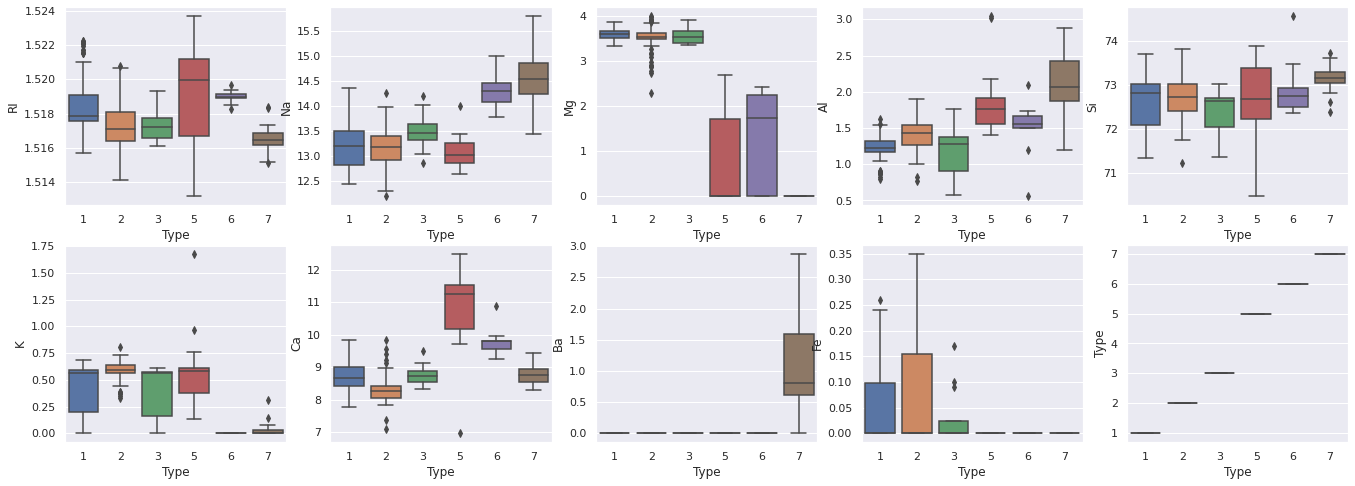

In [ ]:
fig, ax = plt.subplots(2,5, figsize=(23,8))
names=data.columns
for i , ax in enumerate(ax.flat):                                   #graficar sin datos tan esparcidos
  sns.boxplot(data=data, x='Type', y=names[i] , orient='vertical' , ax=ax)

In [ ]:
X=data.iloc[:,:-1]
y=data['Type']

In [ ]:
X.shape

(214, 9)

In [ ]:
X.sample(4)                     #separar datos en modelo

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
205,1.517320,14.950000,0.000000,1.80,72.99,0.00,8.610000,1.55,0.00
105,1.517188,13.182429,3.495469,1.88,72.19,0.81,8.297619,0.00,0.34
183,1.519690,14.560000,0.000000,0.56,73.48,0.00,9.791667,0.00,0.00
78,1.516130,13.920000,3.520000,1.25,72.88,0.37,7.940000,0.00,0.14


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(171, 9)

In [ ]:
X_train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
79,1.51590,12.82,3.520000,1.900000,72.860000,0.690000,7.970000,0.0,0.000
161,1.51934,13.64,3.540000,0.750000,72.650000,0.160000,8.890000,0.0,0.024
109,1.51818,13.72,3.495469,1.421449,72.694507,0.588125,8.297619,0.0,0.000
127,1.52081,13.78,2.280000,1.430000,71.990000,0.490000,9.850000,0.0,0.170
95,1.51860,13.36,3.430000,1.430000,72.260000,0.510000,8.600000,0.0,0.000


In [ ]:
keras.backend.clear_session()

In [ ]:
def build_model(n_neurons=55, n_hidden=2, input_shape=(9,)):
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(n_neurons, activation='relu', input_shape=input_shape))
  for i in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation='relu'))                #crea la red, con funciones de activaciñon, 55 neuronas, 2 ocultas
  model.add(keras.layers.Dense(6, activation='softmax'))
  model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
keras_cs = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model, epochs=100, verbose=1)       #hace revisión

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
model =  Pipeline([
                   ('scale', StandardScaler()), ('ann', keras_cs)       #usa pipeline para organizar
])                

In [ ]:
parametros = {
    'ann__n_hidden':[0,1,2,3],
    'ann__n_neurons':np.arange(45,60),
    'ann__batch_size':[10,15,20]
}

In [ ]:
rnd_search = RandomizedSearchCV(model, parametros, n_iter=50, n_jobs=-1, cv=3, scoring='accuracy')

In [ ]:
grid_result = rnd_search.fit(X_train,y_train)

Epoch 1/100
18/18 [==============================] - 0s 3ms/step - loss: 1.7563 - accuracy: 0.2047
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 1.6152 - accuracy: 0.3684
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 1.4921 - accuracy: 0.5146
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 1.3964 - accuracy: 0.5263
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 1.3172 - accuracy: 0.5146
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 1.2550 - accuracy: 0.5263
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 1.1968 - accuracy: 0.5205
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 1.1457 - accuracy: 0.5205
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 1.1005 - accuracy: 0.5322
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 1.0623 - accuracy: 0.5497
Epoch 11/

In [ ]:
grid_result.best_params_              #resultado con mejor precisión

{'ann__batch_size': 10, 'ann__n_hidden': 1, 'ann__n_neurons': 45}

In [ ]:
sk_params = {
    'batch_size':grid_result.best_params_['ann__batch_size'],
    'n_hidden': grid_result.best_params_['ann__n_hidden'],
    'n_neurons':grid_result.best_params_['ann__n_neurons']
}

In [ ]:
sk_params

{'batch_size': 10, 'n_hidden': 1, 'n_neurons': 45}

In [ ]:
keras.backend.clear_session()

In [ ]:
keras_cs = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model, epochs=100 , verbose=1, **sk_params)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
modeloo =  Pipeline([
                   ('scale', StandardScaler()), ('ann', keras_cs)
])

In [ ]:
modeloo.fit(X_train,y_train)

Epoch 1/100
18/18 [==============================] - 1s 10ms/step - loss: 1.8439 - accuracy: 0.2222
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 1.7080 - accuracy: 0.3977
Epoch 3/100
18/18 [==============================] - 0s 8ms/step - loss: 1.5928 - accuracy: 0.4854
Epoch 4/100
18/18 [==============================] - 0s 9ms/step - loss: 1.5018 - accuracy: 0.4854
Epoch 5/100
18/18 [==============================] - 0s 11ms/step - loss: 1.4208 - accuracy: 0.4854
Epoch 6/100
18/18 [==============================] - 0s 12ms/step - loss: 1.3528 - accuracy: 0.4912
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 1.2915 - accuracy: 0.5088
Epoch 8/100
18/18 [==============================] - 0s 8ms/step - loss: 1.2363 - accuracy: 0.5146
Epoch 9/100
18/18 [==============================] - 0s 7ms/step - loss: 1.1862 - accuracy: 0.5556
Epoch 10/100
18/18 [==============================] - 0s 5ms/step - loss: 1.1405 - accuracy: 0.6374
Epoch 

Pipeline(steps=[('scale', StandardScaler()),
                ('ann',
                 <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f88a5ff6210>)])

              precision    recall  f1-score   support

           1       0.79      1.00      0.88        11
           2       0.79      0.79      0.79        14
           3       1.00      0.33      0.50         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         8

    accuracy                           0.86        43
   macro avg       0.93      0.81      0.84        43
weighted avg       0.88      0.86      0.85        43



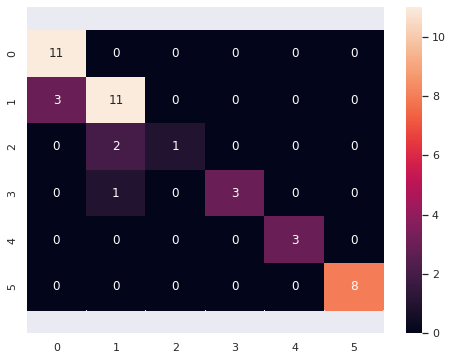

In [ ]:
y_fit=modeloo.predict(X_test)
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_fit), annot=True)             #graficar el modelo y sus presiciones
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t)
print(classification_report(y_test,y_fit))

In [ ]:
modele = Pipeline((
            ('scale', StandardScaler())  , ('log_reg', LogisticRegression( multi_class='multinomial', solver='lbfgs', C=30, max_iter=500, ))
))

In [ ]:
grid_params= {
    'log_reg__C':np.arange(1,50),
    'log_reg__class_weight':['balanced', None]          #usa la activaciñon como parámetro
}

In [ ]:
grid_result = GridSearchCV(estimator=modele, param_grid=grid_params, n_jobs=-1, cv=5)
grid_result.fit(X_train,y_train)
print(grid_result.best_params_)
model=grid_result.best_estimator_

{'log_reg__C': 1, 'log_reg__class_weight': None}


              precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.77      0.71      0.74        14
           3       0.00      0.00      0.00         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         8

    accuracy                           0.81        43
   macro avg       0.74      0.74      0.74        43
weighted avg       0.78      0.81      0.79        43



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


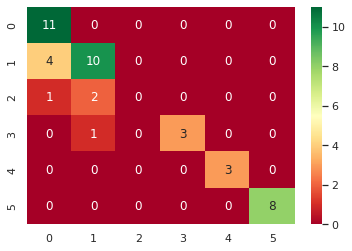

In [ ]:
model.fit(X_train,y_train)
y_fit=model.predict(X_test)
print(classification_report(y_test,y_fit))
sns.heatmap(confusion_matrix(y_test,y_fit), annot=True, cmap='RdYlGn')

###**Ejercicio 6:**
Regresión: Objetivo: predecir el precio de casas en la ciuidad de california

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import seaborn as sns; sns.set()
from tensorflow import keras
from sklearn.linear_model import LinearRegression

In [ ]:
housing = fetch_california_housing()

In [ ]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='Price')

In [ ]:
X.shape

(20640, 8)

In [ ]:
X.sample(4)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
15034,5.4333,29.0,7.233766,1.058442,385.0,2.500000,32.78,-116.99
16040,3.5156,42.0,4.794621,1.044010,1211.0,2.960880,37.71,-122.47
12349,3.6667,15.0,14.304762,2.928571,437.0,2.080952,33.80,-116.48
3899,4.5648,36.0,4.864469,1.051282,823.0,3.014652,34.21,-118.52


In [ ]:
print(housing.DESCR)            #el dataset proporcionaba esta info

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

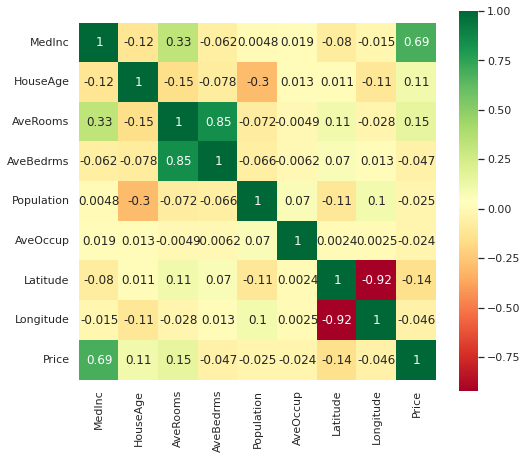

In [ ]:
plt.figure(figsize=(8,7))
sns.heatmap(X.join(y).corr(), square=True, annot=True, cmap='RdYlGn')           #relación de datos

In [ ]:
X_train , X_test, y_train, y_test =  train_test_split(X,y, test_size=0.2)

In [ ]:
X_train.sample(4)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
19622,4.0000,36.0,6.000000,1.500000,27.0,3.375000,37.33,-121.29
6351,5.4110,33.0,5.890909,1.029091,868.0,3.156364,34.14,-117.94
954,5.1406,46.0,6.153846,1.004808,512.0,2.461538,37.64,-121.92
12930,5.6529,14.0,6.817822,1.009901,1413.0,2.798020,38.65,-121.21


In [ ]:
keras.backend.clear_session()

In [ ]:
def build_model(n_neurons=5, n_hidden=2, input_shape=(8,)):
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(n_neurons, activation='relu', input_shape=input_shape))          #crea red neuronal y sus activadores
  for i in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation='relu'))
  model.add(keras.layers.Dense(1))
  model.compile(optimizer='sgd', loss='mean_squared_error')
  return model

In [ ]:
keras_cs = keras.wrappers.scikit_learn.KerasRegressor(build_fn=build_model, epochs=30, verbose=1, validation_split=0.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
model =  Pipeline([
                   ('scale', StandardScaler()), ('ann', keras_cs)
])

In [ ]:
params = {
    'ann__n_hidden':[0,1,2,3],
    'ann__n_neurons':np.arange(20,40),
    'ann__batch_size':[10,15,20,25]
}

In [ ]:
rnd_search = RandomizedSearchCV(model, params, n_iter=10, n_jobs=-1, cv=3)

In [ ]:
grid_result = rnd_search.fit(X_train,y_train)

In [ ]:
grid_result.best_params_

{'ann__batch_size': 15, 'ann__n_hidden': 0, 'ann__n_neurons': 25}

In [ ]:
sk_params = {
    'batch_size':grid_result.best_params_['ann__batch_size'],
    'n_hidden': grid_result.best_params_['ann__n_hidden'],
    'n_neurons':grid_result.best_params_['ann__n_neurons']
}

In [ ]:
sk_params               #mejor resultado de parámetros

{'batch_size': 15, 'n_hidden': 0, 'n_neurons': 25}

In [ ]:
keras.backend.clear_session()

In [ ]:
keras_cs = keras.wrappers.scikit_learn.KerasRegressor(build_fn=build_model, epochs=20 , verbose=0, **sk_params)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
model =  Pipeline([
                   ('scale', StandardScaler()), ('ann', keras_cs)
])

In [ ]:
model.fit(X_train, y_train);
y_fit = model.predict(X_test);
print(mean_squared_error(y_test,y_fit))             #errores y presiión
r2_score(y_test, y_fit )

0.41519713800544256


0.6848826888780939

In [ ]:
model =  Pipeline([
                   ('scale', StandardScaler()), ('linear_model', LinearRegression())
])

In [ ]:
model.fit(X_train,y_train)
y_fit =  model.predict(X_test)
print(mean_squared_error(y_test,y_fit))           #resultado final
r2_score(y_test,y_fit)

0.514489372764415


0.6095240238765969

#Sesión 4

###**Ejercicio 0:**
Intenta construir una red neuronal profunda con 120 neuronas de entrada y dos capas ocultas, con 100 y 80 neuronas, cuya función de activación sea 'relu' y en su capa de salida una softmax, compilala usando el optimizador adam

Ahora entrena la red (fit) con nuestros datos de entrenamiento, en los cuales uses un 30% para validación, con 50 épocas y gráfica las curvas de validación

Crea un segunda red neuronal profunda en la cual utilizes el método de regularización L2, con su hiperparámetro igual a  0.002 . Compilalo con las mismas carácterisitcas de la red anterior y gráfica las curvas de validación.

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
data_train=pd.read_csv('https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso2/master/Datasets/poker-hand-training-true.data',
                       names=['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5','hand'])
data_test=pd.read_csv('https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso2/master/Datasets/poker-hand-testing.data',
                      names=['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5','hand'])

In [ ]:
X=data_train.iloc[:,:-1].values
Y=data_train['hand'].values
X2=data_test.iloc[:,:-1].values                   #dicide datos
Y2=data_test['hand'].values

In [ ]:
X_train_s= scaler.fit_transform(X)
X_test_s = scaler.fit_transform(X2)                   #escala o "normaliza"

In [ ]:
model=keras.models.Sequential()
model.add(keras.layers.Dense(120,input_dim=10))
model.add(keras.layers.Dense(100,activation='relu'))                #crea el modelo y sus funciones
model.add(keras.layers.Dense(80,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])     #compila

In [ ]:
history1=model.fit(X_train_s,Y,epochs=50,validation_split=0.3,shuffle=False)        

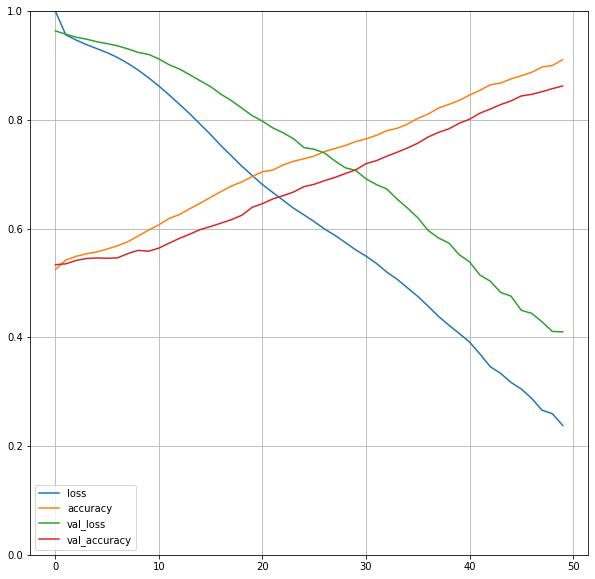

In [ ]:
pd.DataFrame(history1.history).plot(figsize=(10,10))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]        #usa el historial de pruebas para comparar datos de presición del modelo
plt.show()

In [ ]:
model_2= keras.models.Sequential([
                  keras.layers.Dense(120,input_dim=10,kernel_regularizer=keras.regularizers.l2(0.002)),
                  keras.layers.Dense(100,activation='relu',kernel_regularizer=keras.regularizers.l2(0.002)),      #utiliza l2 para regularizar
                  keras.layers.Dense(80,activation='relu',kernel_regularizer=keras.regularizers.l2(0.002)),
                  keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model_2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history2=model_2.fit(X_train_s,Y,epochs=50,validation_split=0.3,shuffle=False)

Epoch 1/50
548/548 [==============================] - 2s 3ms/step - loss: 1.2931 - accuracy: 0.5227 - val_loss: 1.1276 - val_accuracy: 0.5286
Epoch 2/50
548/548 [==============================] - 2s 4ms/step - loss: 1.0705 - accuracy: 0.5412 - val_loss: 1.0336 - val_accuracy: 0.5317
Epoch 3/50
548/548 [==============================] - 2s 4ms/step - loss: 1.0146 - accuracy: 0.5450 - val_loss: 1.0009 - val_accuracy: 0.5365
Epoch 4/50
548/548 [==============================] - 2s 3ms/step - loss: 0.9931 - accuracy: 0.5477 - val_loss: 0.9862 - val_accuracy: 0.5371
Epoch 5/50
548/548 [==============================] - 2s 3ms/step - loss: 0.9829 - accuracy: 0.5505 - val_loss: 0.9782 - val_accuracy: 0.5397
Epoch 6/50
548/548 [==============================] - 2s 3ms/step - loss: 0.9768 - accuracy: 0.5509 - val_loss: 0.9730 - val_accuracy: 0.5434
Epoch 7/50
548/548 [==============================] - 2s 3ms/step - loss: 0.9726 - accuracy: 0.5504 - val_loss: 0.9691 - val_accuracy: 0.5451
Epoch 

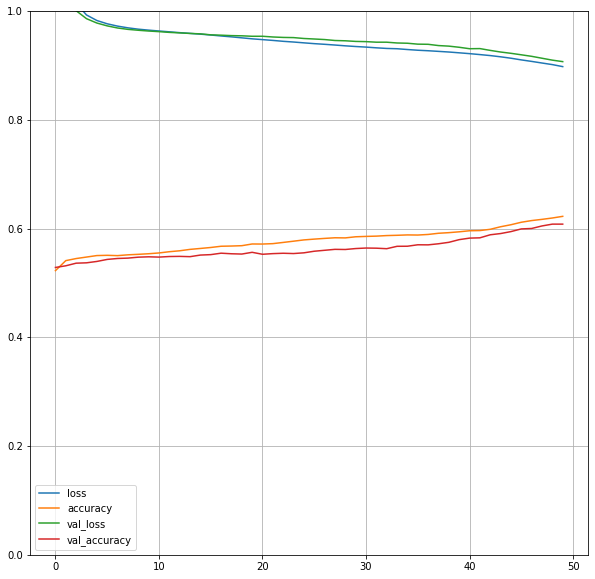

In [ ]:
pd.DataFrame(history2.history).plot(figsize=(10,10))
plt.grid(True)
plt.gca().set_ylim(0, 1)#este es el rango vertical
plt.show()

###**Ejercicio 1:**
Entrene una red neuronal en keras para el dataset de Iris con 3 capas ocultas de 4 neuronas cada una con funciones de activación sigmoide. Use gradiente estocástico con gradient clipping

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
!pip install keras-utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for keras-utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=4fa297079db5a8e9438f78a655f03767ff2201bf83acf59082eb9691e2b4ded0
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras-utils


In [ ]:
import keras
import keras_utils

from sklearn.datasets import load_iris
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import gradient_descent_v2
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.optimizer_v1 import SGD

In [ ]:
data=load_iris()
X,y=data.data,data.target
X-=X.mean(axis=0)
X/=X.std(axis=0)
y=to_categorical(y)

In [ ]:
X.shape

(150, 4)

In [ ]:
y.shape

(150, 3)

In [ ]:
modelo=Sequential()
modelo.add(Dense(4,activation='sigmoid',input_shape=(4,)))
modelo.add(Dense(4,activation='sigmoid'))                                 #crea modelo y con función sigmoide
modelo.add(Dense(4,activation='sigmoid'))
modelo.add(Dense(3,activation='softmax'))

In [ ]:
optim=SGD(clipnorm=1)               #optimiza con esa función


In [ ]:
modelo.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy'])
modelo.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 4)                 20        
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 4)                 20        
                                                                 
 dense_15 (Dense)            (None, 3)                 15        
                                                                 
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelo.fit(x=X,y=y, batch_size=10,epochs=200)

Epoch 1/200
15/15 [==============================] - 1s 3ms/step - loss: 1.1316 - accuracy: 0.3333
Epoch 2/200
15/15 [==============================] - 0s 2ms/step - loss: 1.1246 - accuracy: 0.3333
Epoch 3/200
15/15 [==============================] - 0s 3ms/step - loss: 1.1186 - accuracy: 0.3333
Epoch 4/200
15/15 [==============================] - 0s 2ms/step - loss: 1.1141 - accuracy: 0.3333
Epoch 5/200
15/15 [==============================] - 0s 5ms/step - loss: 1.1103 - accuracy: 0.3333
Epoch 6/200
15/15 [==============================] - 0s 3ms/step - loss: 1.1069 - accuracy: 0.3333
Epoch 7/200
15/15 [==============================] - 0s 3ms/step - loss: 1.1047 - accuracy: 0.3333
Epoch 8/200
15/15 [==============================] - 0s 3ms/step - loss: 1.1027 - accuracy: 0.3333
Epoch 9/200
15/15 [==============================] - 0s 4ms/step - loss: 1.1007 - accuracy: 0.3333
Epoch 10/200
15/15 [==============================] - 0s 3ms/step - loss: 1.0991 - accuracy: 0.3333
Epoch 11/

###**Ejercicio 2:**
Entrene una red neuronal en keras para el dataset de Iris con 3 capas ocultas de 4 neuronas cada una con funciones de activación ReLu, PReLU y SELU respectivamente. Cuantos parámetros tendrá cada capa?

In [ ]:
modelo.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 4)                 20        
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 4)                 20        
                                                                 
 dense_15 (Dense)            (None, 3)                 15        
                                                                 
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________


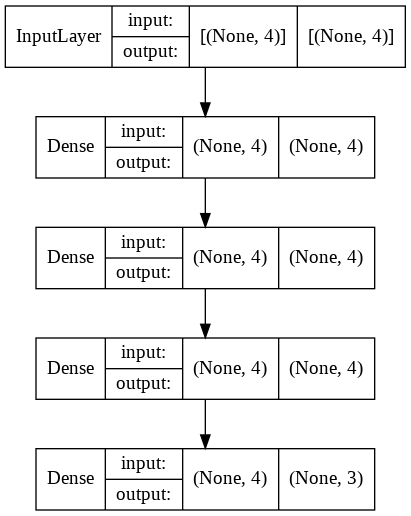

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(modelo,show_shapes=True,show_layer_names=False)      #muestra gráficamente las capas

In [ ]:
from sklearn.datasets import load_iris
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,PReLU,ReLU #Puedo importar las funciones
from tensorflow.keras.utils import to_categorical
data=load_iris()
X,y=data.data,data.target
X-=X.mean(axis=0)
X/=X.std(axis=0)
y=to_categorical(y)
modelo=Sequential()
modelo.add(Dense(4,activation='relu',input_shape=(4,)))
modelo.add(Dense(4))                                                                   #crea el modelo con distintas activaciones y optimizador sgd
modelo.add(PReLU())
modelo.add(Dense(4,activation='selu'))
modelo.add(Dense(3,activation='softmax'))
modelo.compile('sgd',loss='categorical_crossentropy',metrics=['accuracy'])
modelo.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 4)                 20        
                                                                 
 dense_17 (Dense)            (None, 4)                 20        
                                                                 
 p_re_lu (PReLU)             (None, 4)                 4         
                                                                 
 dense_18 (Dense)            (None, 4)                 20        
                                                                 
 dense_19 (Dense)            (None, 3)                 15        
                                                                 
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________


###**Ejercicio 3:**
Entrene una red neuronal para el dataset iris con 3 capas ocultas de 4 neuronas cada una con función de activación ReLU e inicialización Glorot Normal

In [ ]:
from sklearn.datasets import load_iris
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.initializers import glorot_normal #Importar el inicializador

In [ ]:
data=load_iris()

In [ ]:
X,y=data.data,data.target
X-=X.mean(axis=0)
X/=X.std(axis=0)
y=to_categorical(y)

In [ ]:
X.shape

(150, 4)

In [ ]:
glorotinit=glorot_normal()

In [ ]:
modelo=Sequential()
modelo.add(Dense(4,activation='relu',kernel_initializer=glorotinit,input_shape=(4,)))
modelo.add(Dense(4,activation='relu',kernel_initializer='glorot_normal'))                 # "glorot_normal" llama a glorotinit
modelo.add(Dense(4,activation='relu',kernel_initializer='glorot_normal'))
modelo.add(Dense(3,activation='softmax',kernel_initializer='glorot_normal'))              #ver función de glorot y he*
modelo.compile('sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
modelo.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 4)                 20        
                                                                 
 dense_21 (Dense)            (None, 4)                 20        
                                                                 
 dense_22 (Dense)            (None, 4)                 20        
                                                                 
 dense_23 (Dense)            (None, 3)                 15        
                                                                 
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelo.fit(x=X,y=y, batch_size=10,epochs=500)

###**Ejercicio 4:**
Entrene una red neuronal para el dataset iris con 3 capas ocultas de 4 neuronas cada una con función de activación ReLU y Batch Normalization en la segunda capa oculta.

In [ ]:
from sklearn.datasets import load_iris
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization #Importar BatchNorm
from tensorflow.keras.utils import to_categorical

In [ ]:
data=load_iris()
X,y=data.data,data.target
X-=X.mean(axis=0)
X/=X.std(axis=0)
y=to_categorical(y)

In [ ]:
modelo=Sequential()
modelo.add(Dense(4,activation='relu',input_shape=(4,)))
modelo.add(Dense(4,activation='relu'))
modelo.add(BatchNormalization())        #el batch normalization normaliza el output de la capa anterior y paso a paso
                                        # para que aprenda cada capa más independientemente
modelo.add(Dense(4,activation='relu'))
modelo.add(Dense(3,activation='softmax'))
modelo.compile('sgd',loss='categorical_crossentropy',metrics=['accuracy'])
modelo.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 4)                 20        
                                                                 
 dense_25 (Dense)            (None, 4)                 20        
                                                                 
 batch_normalization (BatchN  (None, 4)                16        
 ormalization)                                                   
                                                                 
 dense_26 (Dense)            (None, 4)                 20        
                                                                 
 dense_27 (Dense)            (None, 3)                 15        
                                                                 
Total params: 91
Trainable params: 83
Non-trainable params: 8
__________________________________________________________

In [ ]:
modelo.fit(x=X,y=y, batch_size=10,epochs=500)

###**Ejercicio 5:**
Entrene una red neuronal para el dataset iris con 3 capas ocultas de 4 neuronas cada una con función de activación ReLU y regularización L2 en los pesos y regularización L1 en los bias.


In [ ]:
from sklearn.datasets import load_iris
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization
from keras.regularizers import l1,l2 #Importar Regularizadores
from tensorflow.keras.utils import to_categorical

In [ ]:
data=load_iris()
X,y=data.data,data.target
X-=X.mean(axis=0)
X/=X.std(axis=0)
y=to_categorical(y)

In [ ]:
l2_reg=l2()
l1_reg=l1(0.001)

In [ ]:
modelo.add(Dense(4,activation='relu',kernel_regularizer=l2_reg,bias_regularizer=l1_reg,input_shape=(4,)))
modelo.add(Dense(4,activation='relu',kernel_regularizer='l2',bias_regularizer='l1'))        #utiliza l2 como regularizador normal y l1 como bias
modelo.add(Dense(4,activation='relu',kernel_regularizer='l2',bias_regularizer='l1'))
modelo.add(Dense(3,activation='softmax',kernel_regularizer='l2',bias_regularizer='l1'))
modelo.compile('sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
modelo.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 4)                 20        
                                                                 
 dense_25 (Dense)            (None, 4)                 20        
                                                                 
 batch_normalization (BatchN  (None, 4)                16        
 ormalization)                                                   
                                                                 
 dense_26 (Dense)            (None, 4)                 20        
                                                                 
 dense_27 (Dense)            (None, 3)                 15        
                                                                 
 dense_28 (Dense)            (None, 4)                 16        
                                                      

In [ ]:
modelo.fit(x=X,y=y, batch_size=10,epochs=500)

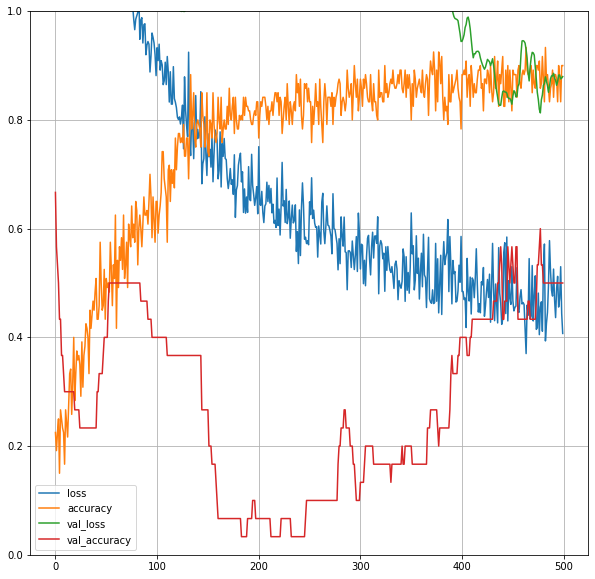

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,10))
plt.grid(True)
plt.gca().set_ylim(0, 1) # rango vertical[0-1]
plt.show()

###**Ejercicio 6**:
Entrene una red neuronal para el dataset iris con 3 capas ocultas de 4 neuronas cada una con función de activación ReLU inicializadando los pesos con glorot_normal y los bias en cero. Aplicar regularización L2 de los pesos y L1 de los bias. Adicionalmente, aplique Batch Normalization en la segunda capa oculta. Entrene la red usando el optimizador Adam con Gradient Clipping y usando un 20% como datos de validación.


In [ ]:
from sklearn.datasets import load_iris
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [ ]:
data=load_iris()
X,y=data.data,data.target
X-=X.mean(axis=0)
X/=X.std(axis=0)
y=to_categorical(y)

In [ ]:
modelo=Sequential()
modelo.add(Dense(4,input_dim=4,activation='relu',kernel_initializer='glorot_normal',bias_initializer='zero',kernel_regularizer='l2',bias_regularizer='l1'))
modelo.add(Dropout(0.2))
modelo.add(Dense(4,activation='relu',kernel_initializer='glorot_normal',bias_initializer='zero',kernel_regularizer='l2',bias_regularizer='l1'))
modelo.add(BatchNormalization())
modelo.add(Dropout(0.2))
modelo.add(Dense(4,activation='relu',kernel_initializer='glorot_normal',bias_initializer='zero',kernel_regularizer='l2',bias_regularizer='l1'))
modelo.add(Dropout(0.2))
modelo.add(Dense(3,activation='softmax',kernel_initializer='glorot_normal',bias_initializer='zero',kernel_regularizer='l2',bias_regularizer='l1'))
modelo.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

^usa glorot como inicializador, sin bias inicial porque ya tiene las regularizaciones de bias de l1

In [ ]:
modelo.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 4)                 20        
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_33 (Dense)            (None, 4)                 20        
                                                                 
 batch_normalization_1 (Batc  (None, 4)                16        
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense_34 (Dense)            (None, 4)                 20        
                                                      

In [ ]:
history=modelo.fit(x=X,y=y,validation_split=0.2,epochs=500)

Epoch 1/500
4/4 [==============================] - 2s 183ms/step - loss: 1.6529 - accuracy: 0.2250 - val_loss: 1.2005 - val_accuracy: 0.6667
Epoch 2/500
4/4 [==============================] - 0s 20ms/step - loss: 1.6749 - accuracy: 0.1917 - val_loss: 1.2073 - val_accuracy: 0.5667
Epoch 3/500
4/4 [==============================] - 0s 19ms/step - loss: 1.5723 - accuracy: 0.2250 - val_loss: 1.2148 - val_accuracy: 0.5333
Epoch 4/500
4/4 [==============================] - 0s 18ms/step - loss: 1.6106 - accuracy: 0.2500 - val_loss: 1.2204 - val_accuracy: 0.5000
Epoch 5/500
4/4 [==============================] - 0s 19ms/step - loss: 1.6338 - accuracy: 0.1500 - val_loss: 1.2267 - val_accuracy: 0.4333
Epoch 6/500
4/4 [==============================] - 0s 19ms/step - loss: 1.5499 - accuracy: 0.2667 - val_loss: 1.2328 - val_accuracy: 0.4333
Epoch 7/500
4/4 [==============================] - 0s 18ms/step - loss: 1.5592 - accuracy: 0.2500 - val_loss: 1.2377 - val_accuracy: 0.3667
Epoch 8/500
4/4 [==

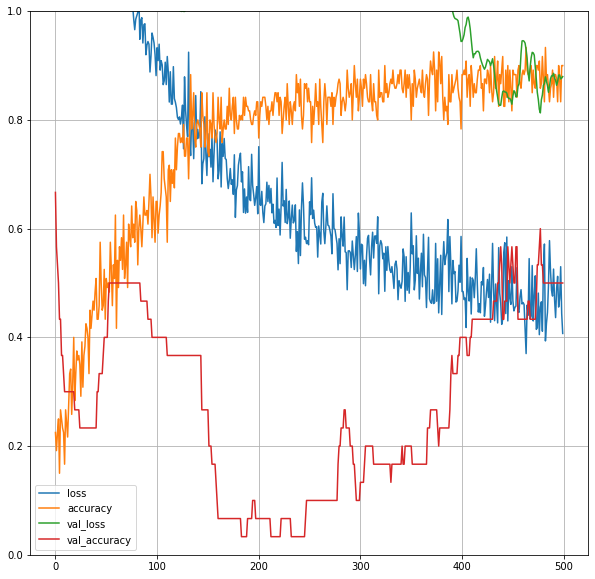

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,10))
plt.grid(True)
plt.gca().set_ylim(0, 1) # rango vertical[0-1]
plt.show()

#Sesión 5 & 6

###**Ejercicio:**
Usando clifar100


In [ ]:
%tensorflow_version 2.x

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from tensorflow import keras 

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
(train_image, train_label) , (test_image, test_label) = keras.datasets.cifar100.load_data()

169017344/169001437 [==============================] - 3s 0us/step


In [ ]:
test_image.shape

(10000, 32, 32, 3)

In [ ]:
train_image.shape

(50000, 32, 32, 3)

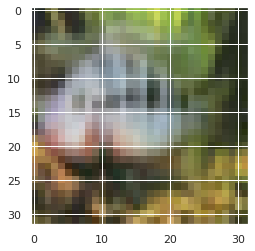

In [ ]:
plt.imshow(train_image[4])

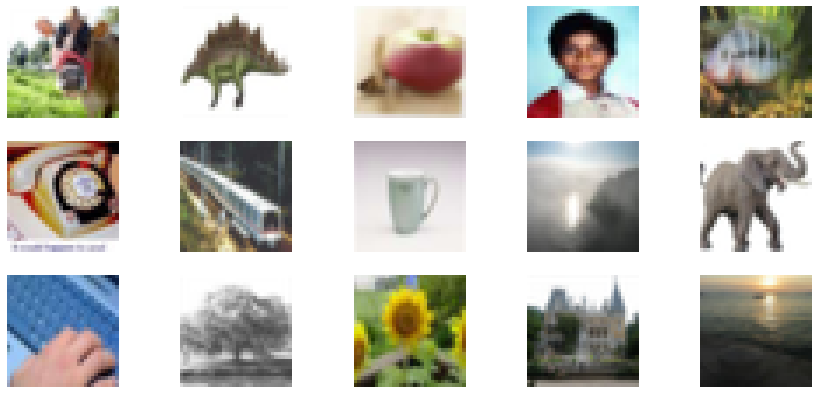

In [ ]:
fig , ax = plt.subplots(3,5, figsize=(15,7))
for i, ax in enumerate(ax.flat):                          #ejemplo de algunas
  ax.imshow(train_image[i], cmap='Greys')
  ax.axis('off')

In [ ]:
train_image = train_image / 255.0
test_image = test_image / 255.0                           #escala y "normaliza" los datos

In [ ]:
keras.backend.clear_session()

In [ ]:
model = keras.models.Sequential([
      keras.layers.Conv2D(32, kernel_size=3, activation='elu', kernel_initializer='he_normal' , padding='same',strides=(1,1) ,input_shape=(32, 32, 3)),
      keras.layers.BatchNormalization(),
      keras.layers.Conv2D(32, kernel_size=3, activation='elu', kernel_initializer='he_normal' , padding='same',strides=(1,1) ,input_shape=(32, 32, 3)),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPool2D(pool_size=(2,2)),
      keras.layers.Dropout(0.3),

      keras.layers.Conv2D(64, kernel_size=3, activation='elu', kernel_initializer='he_normal' , padding='same', strides=(1,1)),
      keras.layers.BatchNormalization(),
      keras.layers.Conv2D(64, kernel_size=3, activation='elu', kernel_initializer='he_normal' , padding='same', strides=(1,1)),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPool2D(pool_size=(2,2)),
      keras.layers.Dropout(0.3),

      keras.layers.Conv2D(128, kernel_size=3, activation='elu', kernel_initializer='he_normal' , padding='same', strides=(1,1)),
      keras.layers.BatchNormalization(),
      keras.layers.Conv2D(128, kernel_size=3, activation='elu', kernel_initializer='he_normal',  padding='same', strides=(1,1)),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPool2D(pool_size=(2,2)),
      keras.layers.Dropout(0.4),

      keras.layers.Flatten(),
      keras.layers.Dense(128, activation='elu', kernel_initializer='he_normal'),

      keras.layers.Dropout(0.5),

      keras.layers.Dense(100, activation='softmax')
])

^crea distintos modelos secuenciales, como convolucionales, y que antes del kernel size, se duplica el valor del optimizador, pues usa batch normalization y cada una, usa el anterior. También avanza en una escata o stride de 1,1. El dropout es mayor para la última para mostrar información que la red considera "más relevante" luego de la final en cada capa

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [ ]:
model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)     #early stop para no tenerlo tan pesado

In [ ]:
model.evaluate(test_image, test_label, verbose=0)     #figura de pérdida y figura de presición

[2.9318811893463135, 0.2750000059604645]

--2022-08-13 23:23:48--  https://upload.wikimedia.org/wikipedia/commons/f/f9/Zoorashia_elephant.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168370 (164K) [image/jpeg]
Saving to: ‘indian_elephant.jpg’

indian_elephant.jpg 100%[===================>] 164.42K  --.-KB/s    in 0.08s   

2022-08-13 23:23:48 (2.10 MB/s) - ‘indian_elephant.jpg’ saved [168370/168370]

--2022-08-13 23:23:48--  https://github.com/ssanchezgoe/diplomado_udea/blob/master/image/african_elephant_bull.jpg?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ssanchezgoe/diplomado_udea/raw/master/image/african_elephant_bull.jpg [following]
--2022-08-13 23:23:49--  https://

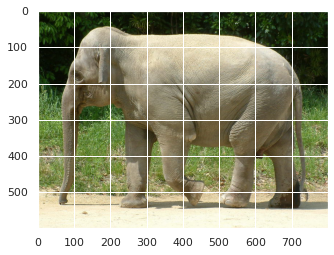

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np


!wget https://upload.wikimedia.org/wikipedia/commons/f/f9/Zoorashia_elephant.jpg -O indian_elephant.jpg# elefante Hindú

!wget https://github.com/ssanchezgoe/diplomado_udea/blob/master/image/african_elephant_bull.jpg?raw=true -O african_elephant.jpg# elefante africano

img_path = 'indian_elephant.jpg' # escoger para clasificar

img = mpimg.imread(img_path)
implot = plt.imshow(img)

print("Tamaño de la imagen:",img.shape)

VGNET: 2 o 3 capas convolucionales, una capa de agrupación, luego nuevamente 2 o 3 capas convolucionales, una capa de agrupación, etc. (con un total de solo 16 capas convolucionales), más una red densa al final con 2 capas ocultas y la capa de salida. Solo usó 3 × 3 filtros, pero muchos filtros. down()

In [ ]:
from keras.preprocessing import image

model = keras.applications.vgg16.VGG16(weights='imagenet', include_top=True)    
model.summary()

553476096/553467096 [==============================] - 11s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

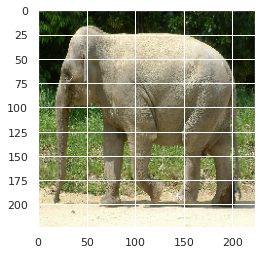

In [ ]:
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
plt.imshow(img)

In [ ]:
x = np.expand_dims(x, axis=0)     #mdimensiones y datos de las capas convolucionales
x[0]

array([[[ 36.,  68.,   3.],
        [ 62.,  97.,  15.],
        [ 27.,  59.,   0.],
        ...,
        [ 25.,  60.,  20.],
        [ 26.,  57.,  13.],
        [ 57.,  78.,  21.]],

       [[ 49.,  84.,   4.],
        [ 74., 106.,  39.],
        [ 49.,  82.,  13.],
        ...,
        [ 21.,  53.,  16.],
        [ 47.,  82.,  42.],
        [ 34.,  67.,  24.]],

       [[ 49.,  81.,  16.],
        [ 50.,  78.,  37.],
        [ 55.,  87.,  24.],
        ...,
        [ 36.,  60.,  28.],
        [ 18.,  45.,  14.],
        [ 43.,  74.,  43.]],

       ...,

       [[249., 245., 220.],
        [255., 251., 226.],
        [255., 254., 229.],
        ...,
        [250., 250., 226.],
        [251., 251., 227.],
        [249., 249., 225.]],

       [[246., 242., 217.],
        [252., 248., 223.],
        [249., 245., 220.],
        ...,
        [252., 250., 227.],
        [252., 250., 227.],
        [249., 247., 224.]],

       [[251., 247., 222.],
        [248., 244., 219.],
        [241., 2

In [ ]:
x = keras.applications.vgg16.preprocess_input(x)

features = model.predict(x)

print("Prediction", keras.applications.vgg16.decode_predictions(features, top=3))

49152/35363 [=========================================] - 0s 0us/step
Prediction [[('n02504013', 'Indian_elephant', 0.7175735), ('n02504458', 'African_elephant', 0.24314483), ('n01871265', 'tusker', 0.03646176)]]


In [ ]:
!pip install keras_applications==1.0.4 --no-deps
!pip install keras_preprocessing==1.0.2 --no-deps
!pip install h5py==2.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: keras-preprocessing
    Found existing installation: Keras-Preprocessing 1.1.2
    Uninstalling Keras-Preprocessing-1.1.2:
      Successfully uninstalled Keras-Preprocessing-1.1.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.8 MB 5.2 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220719082949 requires h5py>=2.9.0, but you have h5py 2.8.0 which is incompatible.
tensorflow 2.8.2+zzzcolab20220719082949 requires keras-preprocessing>=1.1.1, but you have keras-preprocessing 1.0.2 which is incompatible.


In [ ]:
keras.backend.clear_session()

(down)RESNET:::tasa de error inferior a 3.6%, usando una CNN de 152 capas.usa skip connections o conexiones de atajo donde la señal que alimenta a una capa también se agrega a la salida de una capa ubicada un poco más arriba en la pila.


<p><img alt="Colaboratory logo" height="350px" src="https://github.com/ssanchezgoe/diplomado_udea/blob/master/image/resnet.png?raw=true" align="center" hspace="10px" vspace="0px"></p>

In [ ]:
from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input, decode_predictions
import numpy as np

model = keras.applications.resnet50.ResNet50(weights='imagenet')
model.summary()

102981632/102967424 [==============================] - 4s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [ ]:
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = keras.applications.resnet50.preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', keras.applications.resnet50.decode_predictions(preds, top=3)[0])

Predicted: [('n02504013', 'Indian_elephant', 0.8198577), ('n02504458', 'African_elephant', 0.11778774), ('n01871265', 'tusker', 0.05829749)]


(down)transferencia de aprendizaje:::se usan los pesos entrenados de alguna red que realice una tarea similar a la objetivo para no se hacer de nuevo un entrenamiento partiendo de pesos inicializados de manera aleatoria, si no de pesos que ya han creado filtros adecuados para la tarea dada.

In [ ]:
%tensorflow_version 2.x
from tensorflow.keras.applications.vgg16 import VGG16       #vuelve a usar vgg16
model = VGG16()
model.summary()

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                        

In [ ]:
!wget 'https://pbs.twimg.com/profile_images/973248614469312512/ffd7wIOW_400x400.jpg'

--2022-08-13 23:27:29--  https://pbs.twimg.com/profile_images/973248614469312512/ffd7wIOW_400x400.jpg
Resolving pbs.twimg.com (pbs.twimg.com)... 192.229.173.16, 2606:2800:220:1410:489:141e:20bb:12f6
Connecting to pbs.twimg.com (pbs.twimg.com)|192.229.173.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18464 (18K) [image/jpeg]
Saving to: ‘ffd7wIOW_400x400.jpg’

ffd7wIOW_400x400.jp 100%[===================>]  18.03K  --.-KB/s    in 0s      

2022-08-13 23:27:29 (112 MB/s) - ‘ffd7wIOW_400x400.jpg’ saved [18464/18464]



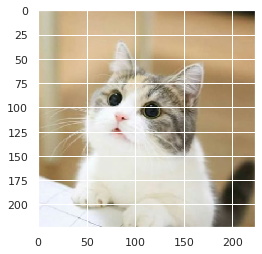

(224, 224, 3)

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt

image = load_img('ffd7wIOW_400x400.jpg', target_size=(224, 224)) #VGG necesita imagenes de 224x224 pixeles
plt.imshow(image)
plt.show()
image = img_to_array(image)
image.shape

In [ ]:
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))#se procesa con el mismo preprocesamiento del entrenamiento
image = preprocess_input(image)

model = VGG16()
yhat = model.predict(image)
label = decode_predictions(yhat)#carga y predición de probabilidades
label = label[0][0]
label

('n02123045', 'tabby', 0.31831238)

In [ ]:
print('%s (%.2f%%)' % (label[1], label[2]*100))

tabby (31.83%)


In [ ]:
label   #dice que la imagen es de un gato, de raza atigrado (tabby) con una certeza de 31.8% (el resto de la probabilidad se reparte entre las otras 999 clases)

('n02123045', 'tabby', 0.31831238)

In [ ]:

from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten

model = VGG16(include_top=False, input_shape=(300, 300, 3)) #se carga el VGG sin las últimas capas (para que pueda entrenarse distinto)

flat1 = Flatten()(model.output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(10, activation='softmax')(class1)#se agregan nuevas capas

model = Model(inputs=model.inputs, outputs=output)#se resuelve un modelo nuevo pero partiendo de lo anterior
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0     

In [ ]:
model = VGG16(include_top=False, input_shape=(300, 300, 3))
for layer in model.layers:
	layer.trainable = False#congela los pesos de las capas para que no entren en el modelo
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


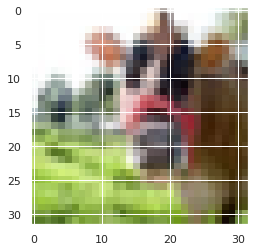

In [ ]:
from matplotlib import pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
from keras.datasets import cifar100

(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')
plt.imshow(x_train[0])

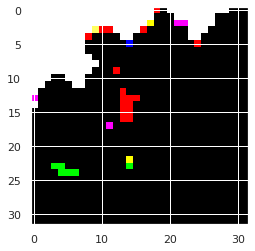

In [ ]:
x_train=preprocess_input(x_train)
x_test=preprocess_input(x_test)               #preprocesar con parámetros de VGG16
plt.imshow(x_train[0])

In [ ]:
conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(32, 32, 3))#carga sin la parte densa
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:   #congelar excepto las últimas 4
    layer.trainable = False
for layer in conv_base.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f02720af1d0> False
<keras.layers.convolutional.Conv2D object at 0x7f0275c26d90> False
<keras.layers.convolutional.Conv2D object at 0x7f026f27e410> False
<keras.layers.pooling.MaxPooling2D object at 0x7f026f5d0710> False
<keras.layers.convolutional.Conv2D object at 0x7f026f5ee810> False
<keras.layers.convolutional.Conv2D object at 0x7f026f5eee50> False
<keras.layers.pooling.MaxPooling2D object at 0x7f026f5d95d0> False
<keras.layers.convolutional.Conv2D object at 0x7f026f5ded10> False
<keras.layers.convolutional.Conv2D object at 0x7f026f5de950> False
<keras.layers.convolutional.Conv2D object at 0x7f026f6b0c10> False
<keras.layers.pooling.MaxPooling2D object at 0x7f026f6b4d90> False
<keras.layers.convolutional.Conv2D object at 0x7f026f6b4110> False
<keras.layers.convolutional.Conv2D object at 0x7f0275c2d3d0> False
<keras.layers.convolutional.Conv2D object at 0x7f026f6b1fd0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f026f6b2390>

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())                                          #cargar ahora sí TODO el modelo
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation='softmax'))

model.compile('adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 512)               0         
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 512)               0

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)    #esto se demora muchisimo, ni intentar que cargue

Epoch 1/10
1070/1563 [===================>..........] - ETA: 14:43 - loss: 4.0968 - acc: 0.0760

KeyboardInterrupt: ignored